## Naive Bayes Classifier

Naive bayes: Naive Bayes is classification approach that adopts the principle of class conditional independence from the Bayes Theorem. This means that the presence of one feature does not impact the presence of another in the probability of a given outcome, and each predictor has an equal effect on that result. There are three types of Naïve Bayes classifiers: Multinomial Naïve Bayes, Bernoulli Naïve Bayes, and Gaussian Naïve Bayes. This technique is primarily used in text classification, spam identification, and recommendation systems.

# problem statement

titanic passenger survivership probability base on different independent variables like:

    1.Pclass

    2.sex

    3.age

    4.fare

    5.embarked

    target --> passenger survived or not

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report


In [2]:
# converting into dataframe
df = pd.read_csv(r"E:\coding\CSV\titanic dataset.csv")
# dropping useles column
df.drop(columns=["PassengerId", "Ticket", "Cabin", "Name", "SibSp", "Parch"], inplace=True)
# converting gender in numerical value
df["Sex"] = df["Sex"].replace(["female", "male"], [0, 1])
# converting class into numerical value
df["Embarked"] = df["Embarked"].replace(["S", "C", "Q"], [1, 2, 3])


In [3]:
# fiiing mean age in nan value place
df["Age"].fillna(df["Age"].mean(),inplace=True)
# converting into integer from float
df["Age"] = df["Age"].apply(np.ceil).astype(int)
df


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,35,7.8292,3
1,1,3,0,47,7.0000,1
2,0,2,1,62,9.6875,3
3,0,3,1,27,8.6625,1
4,1,3,0,22,12.2875,1
...,...,...,...,...,...,...
413,0,3,1,31,8.0500,1
414,1,1,0,39,108.9000,2
415,0,3,1,39,7.2500,1
416,0,3,1,31,8.0500,1


In [4]:
df["Fare"] = df["Fare"].round(2)
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Sex       417 non-null    int64  
 3   Age       417 non-null    int32  
 4   Fare      417 non-null    float64
 5   Embarked  417 non-null    int64  
dtypes: float64(1), int32(1), int64(4)
memory usage: 21.2 KB


In [5]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,35,7.83,3
1,1,3,0,47,7.00,1
2,0,2,1,62,9.69,3
3,0,3,1,27,8.66,1
4,1,3,0,22,12.29,1
...,...,...,...,...,...,...
413,0,3,1,31,8.05,1
414,1,1,0,39,108.90,2
415,0,3,1,39,7.25,1
416,0,3,1,31,8.05,1


In [6]:
# target value as target
target = df.Survived
# feature value as predictor
predictor = df[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
predictor

,Pclass,Sex,Age,Fare,Embarked
0,3,1,35,7.83,3
1,3,0,47,7.00,1
2,2,1,62,9.69,3
3,3,1,27,8.66,1
4,3,0,22,12.29,1
...,...,...,...,...,...
413,3,1,31,8.05,1
414,1,0,39,108.90,2
415,3,1,39,7.25,1
416,3,1,31,8.05,1


In [7]:
# splitting dataframe into training and testing sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.25, random_state=2)

Each algorithm of NB expects different types of data.

GaussianNB → When you have continuous features.

CategoricalNB → When you have categorical data.

MultinomialNB → Applied to text data.

In [8]:
# creating naive bayes model with sklearn module
# Gaussian naive bayes model has been used here
from  sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

In [9]:
# fitting features training dataset and target training dataset in the nb_model
nb_model = nb_model.fit(X_train,y_train)
nb_model


GaussianNB()

In [10]:
# nb_model score of feature test dataset with target test dataset
nb_model.score(X_test,y_test)

1.0

In [11]:
nb_model.predict_proba(X_test[:10])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [12]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        36

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [13]:
y_test[:10]

329    0
20     0
319    0
222    1
187    0
216    1
307    0
100    1
416    0
278    0
Name: Survived, dtype: int64

In [14]:
nb_model.predict(X_test[:10])

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

data_predict = nb_model.predict(X_test)

data_accuracy = accuracy_score(data_predict,y_test)
data_recall = recall_score(data_predict,y_test)
data_precision = precision_score(data_predict,y_test)

In [16]:
data_accuracy

1.0

In [17]:
data_recall

1.0

In [18]:
data_precision

1.0

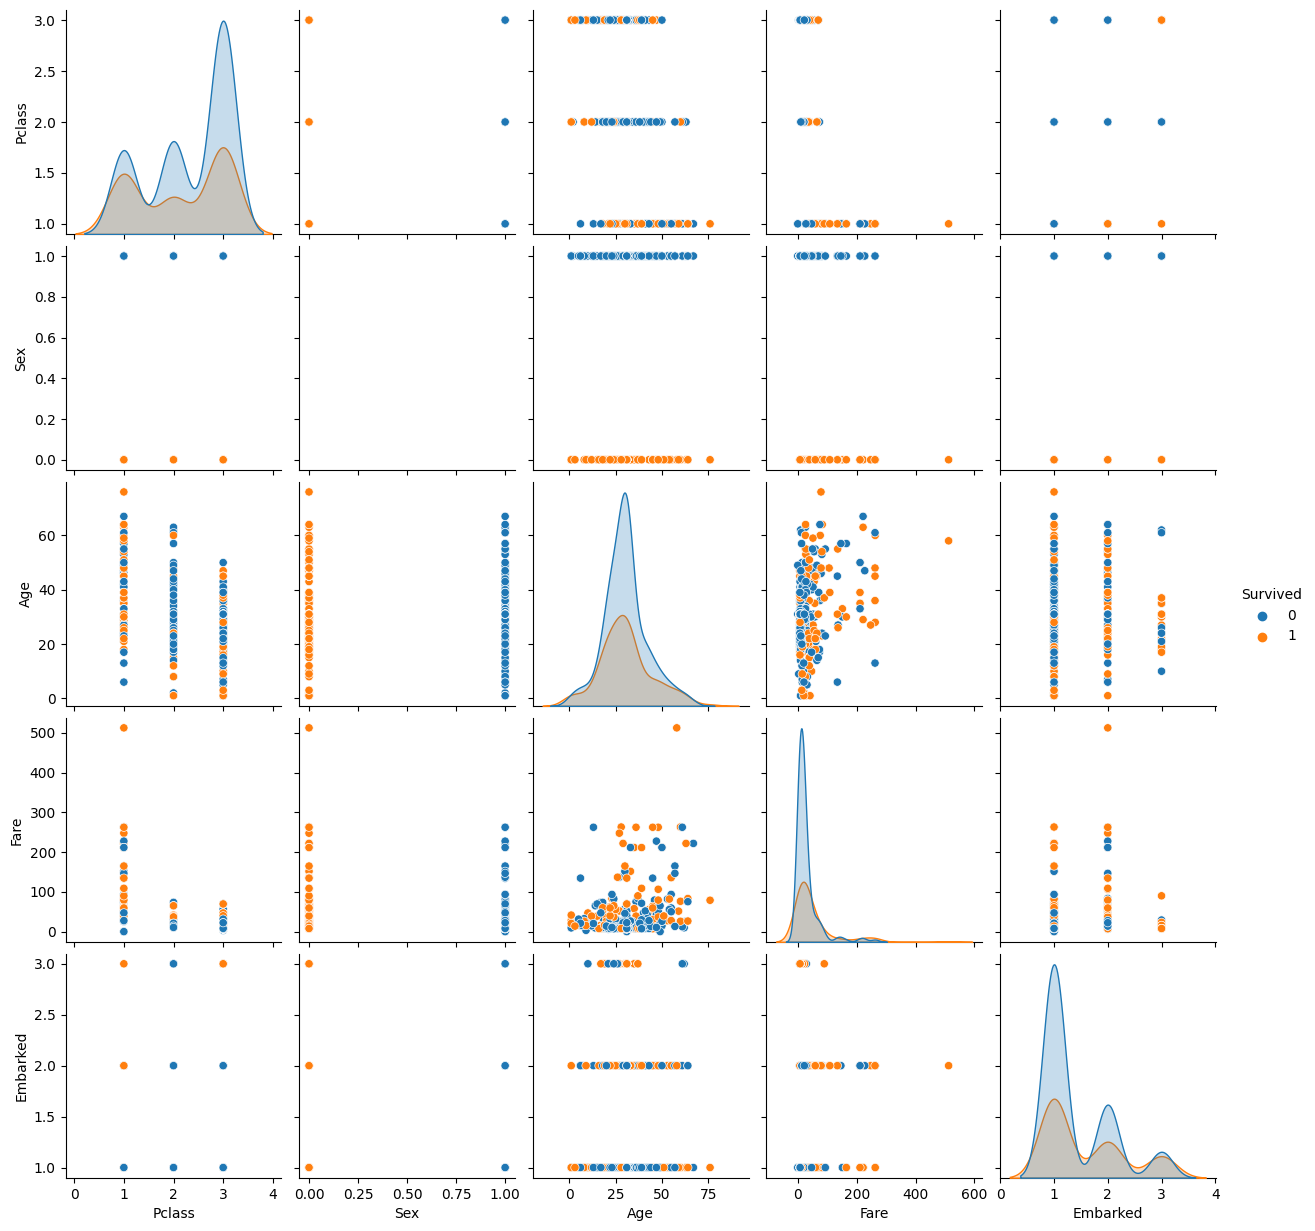

In [19]:
import seaborn as sns

# Visualize the whole dataset
sns.pairplot(df, hue='Survived')